In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tsfresh import extract_features
from tsfresh.feature_extraction import MinimalFCParameters, EfficientFCParameters

In [2]:
df_ach_at = pd.read_hdf("data/processed/ach_at_full.h5")

In [4]:
df_ach_at.describe()

,t,window_id,0,1,2,3,4,5,6,7,...,51,52,53,54,55,56,57,58,59,y
count,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,...,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06,2.700000e+06
mean,2.250000e+06,3.745001e+02,-2.823907e+00,-5.542742e-01,-3.073298e+00,-7.610051e-01,-2.856494e+00,-2.978626e-01,-6.454186e+00,1.402884e+00,...,-1.100973e+00,-3.602360e+00,-9.162323e-01,-3.878938e+00,-1.596250e+00,-2.771033e+00,-1.184038e+00,-2.934648e+00,-1.039923e+00,1.000000e+00
std,9.074692e+05,1.512446e+02,3.503185e+01,3.499377e+01,3.519258e+01,3.578809e+01,8.896305e+01,3.641310e+01,1.021626e+02,1.778763e+02,...,3.331749e+01,3.636550e+01,3.636826e+01,1.379979e+02,1.195931e+02,3.554961e+01,3.673495e+01,3.493158e+01,3.546534e+01,8.164967e-01
min,9.000010e+05,1.500000e+02,-2.179927e+02,-2.111690e+02,-2.171187e+02,-2.153487e+02,-1.448390e+03,-2.225614e+02,-8.551573e+02,-4.014016e+03,...,-2.733249e+02,-2.340558e+02,-3.848205e+02,-1.235074e+03,-1.447060e+03,-2.207157e+02,-2.188103e+02,-2.198858e+02,-2.242796e+02,0.000000e+00
25%,1.365001e+06,2.270000e+02,-1.282312e+01,-9.047015e+00,-1.277248e+01,-1.110887e+01,-1.349406e+01,-1.020689e+01,-2.259583e+01,-2.938887e+01,...,-1.401929e+01,-1.718131e+01,-1.473370e+01,-3.129482e+01,-2.010706e+01,-1.260717e+01,-1.048375e+01,-1.222141e+01,-9.898399e+00,0.000000e+00
50%,2.250000e+06,3.750000e+02,-2.093583e+00,-9.858942e-01,-2.244814e+00,-1.013009e+00,-2.044574e+00,-6.568633e-01,-1.660113e+00,-5.357740e-01,...,-3.245437e-01,-1.084132e+00,-2.045634e-01,-1.256084e+00,-8.704967e-01,-1.351242e+00,-8.834878e-01,-1.897956e+00,-1.162469e+00,1.000000e+00
75%,3.105000e+06,5.170000e+02,7.860600e+00,8.814614e+00,7.916188e+00,1.003612e+01,9.812305e+00,9.853754e+00,1.892330e+01,2.813162e+01,...,1.195771e+01,1.029462e+01,1.263889e+01,2.761196e+01,1.828292e+01,7.549178e+00,8.563208e+00,7.140908e+00,8.758170e+00,2.000000e+00
max,3.600000e+06,6.000000e+02,2.815248e+02,2.915883e+02,2.834849e+02,3.045122e+02,1.117870e+03,3.280720e+02,6.707542e+02,2.050914e+03,...,2.329862e+02,2.601497e+02,2.698119e+02,1.516624e+03,1.812131e+03,2.780464e+02,2.906617e+02,2.783582e+02,2.949028e+02,2.000000e+00


In [8]:
# visualise some of the data
# look at the 1st window (baseline) where y = 0
df_window_1 = (df_ach_at.iloc[0:6000,:]
               .drop(columns = ['window_id', 'y'])
               .set_index('t')
               .reset_index(drop=True))

# take the 1st window with y = 1
df_window_2 = (df_ach_at.iloc[180000:186000,:]
               .drop(columns = ['window_id', 'y'])
               .set_index('t')
               .reset_index(drop=True))

# take the 1st window with y = 2
df_window_3 = (df_ach_at.iloc[360000:366000,:]
               .drop(columns = ['window_id', 'y'])
               .set_index('t')
               .reset_index(drop=True))

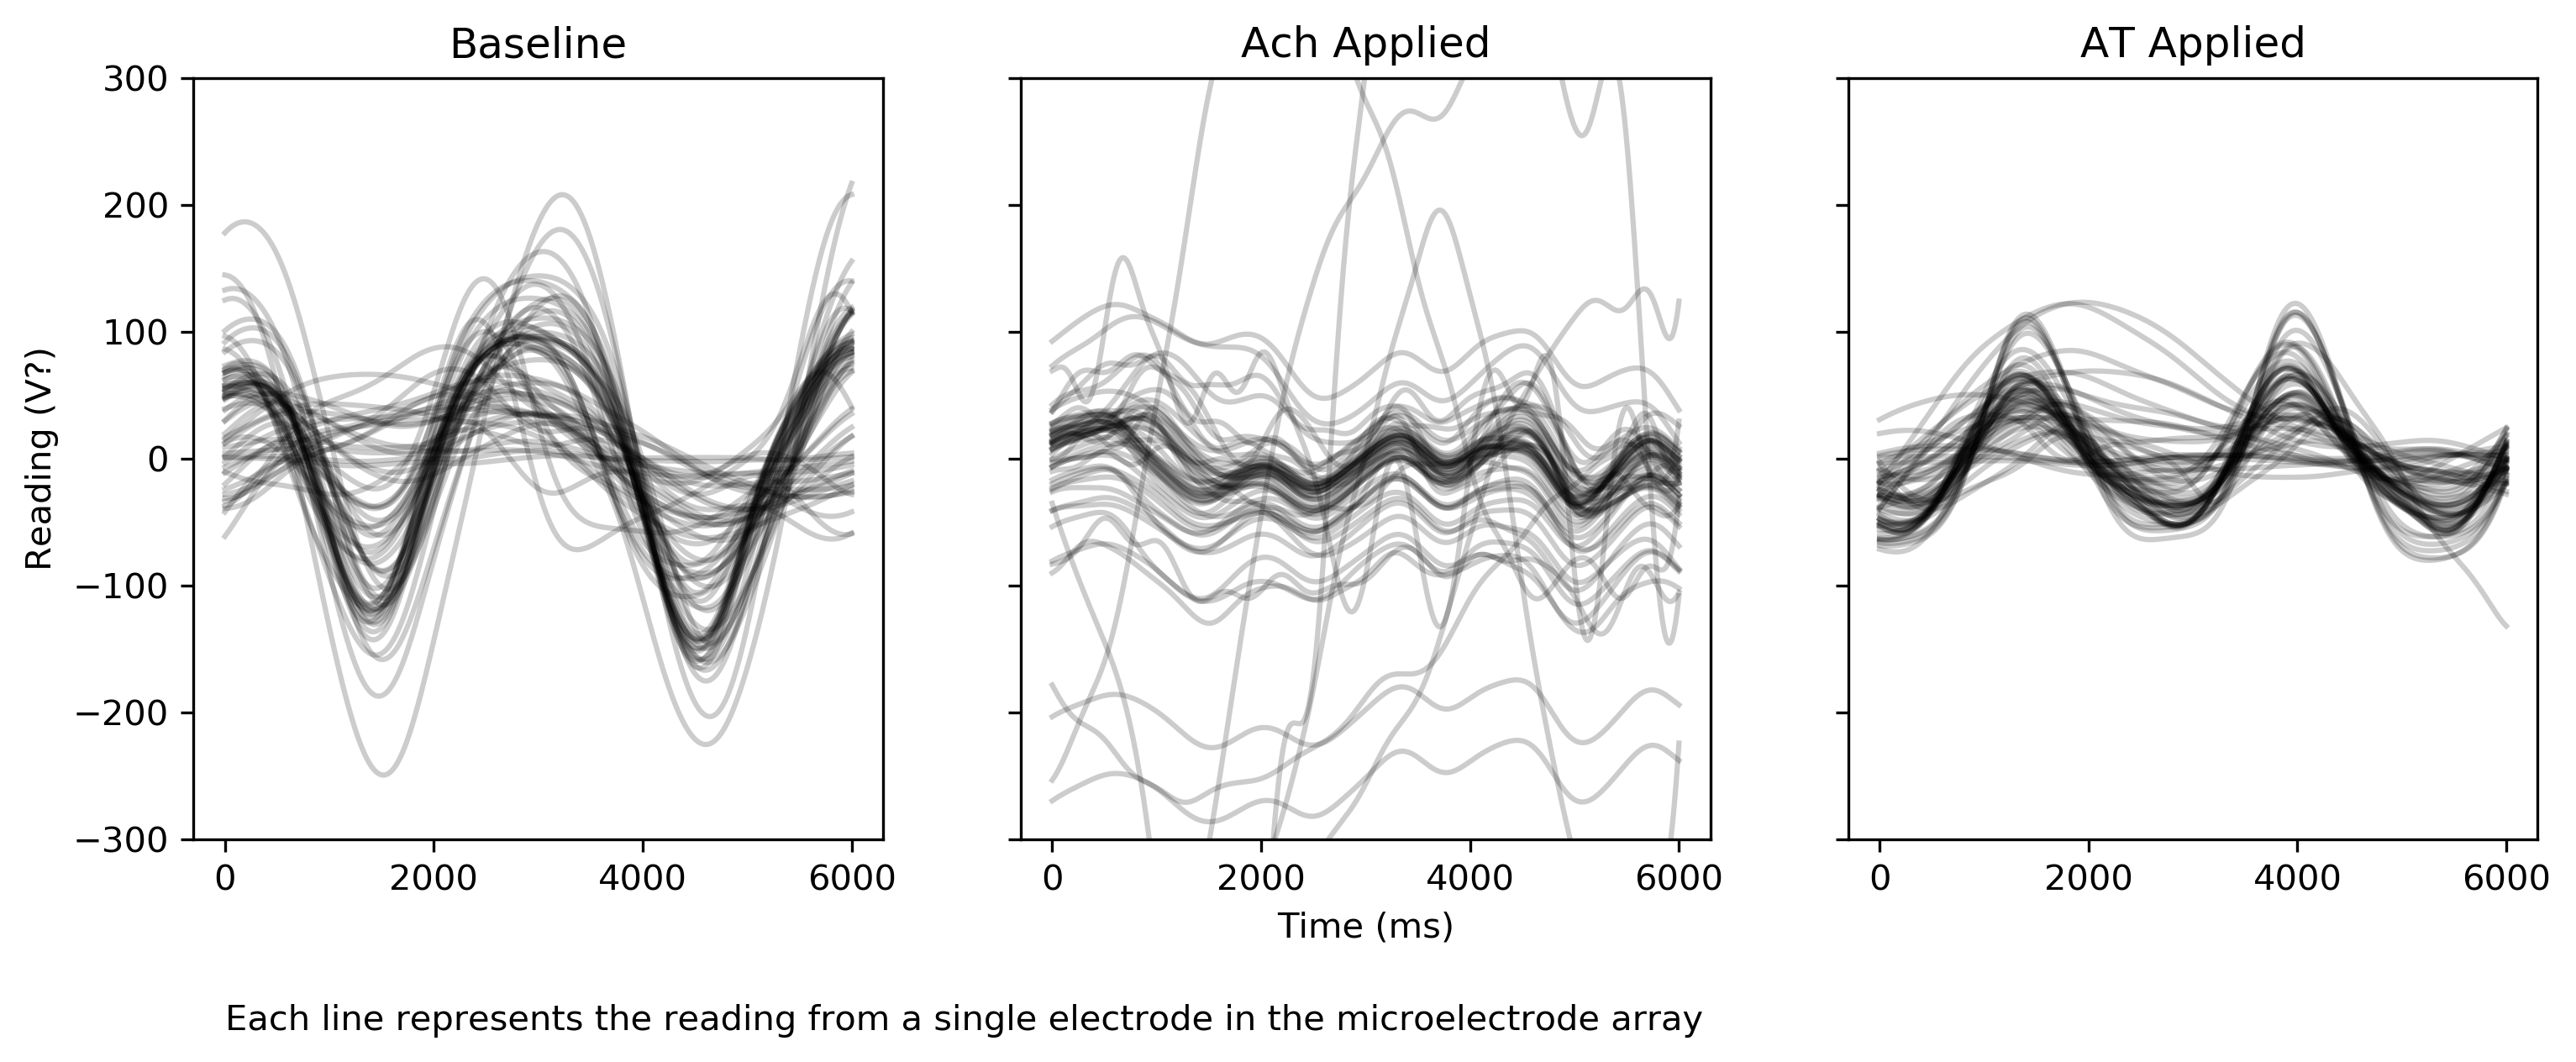

In [9]:
caption = "Each line represents the reading from a single electrode in the microelectrode array"

plt.figure(figsize = (12,4), dpi = 300)
plt.subplot(131)
plt.ylabel("Reading (V?)")
plt.ylim(-300,300)
plt.plot(df_window_1, 'k', alpha=0.2)
plt.title("Baseline")
plt.text(0, -450, caption)
plt.subplot(132, yticklabels = [])
plt.xlabel("Time (ms)")
plt.plot(df_window_2, 'k', alpha=0.2)
plt.ylim(-300,300)
plt.title("Ach Applied")
plt.subplot(133, yticklabels = [])
plt.plot(df_window_3, 'k', alpha=0.2)
plt.ylim(-300,300)
plt.title("AT Applied")
plt.show()

In [10]:
# Begin feature extraction
y = (df_ach_at[['window_id','y']]
     .drop_duplicates()
     .set_index('window_id')
     .T
     .squeeze())

df_ach_at = df_ach_at[['t','window_id', 29, 30, 28, 27, 4, 3, 2, 1]]

KeyError: "['y'] not in index"

In [4]:
X_min = extract_features(df_ach_at, column_id='window_id', column_sort='t', default_fc_parameters=MinimalFCParameters())

MemoryError: Unable to allocate 1.21 GiB for an array with shape (162000000,) and data type object

NameError: name 'X_min' is not defined